In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [3]:
print('min=',creditcard_df['BALANCE'].min())
print('max=',creditcard_df['BALANCE'].max())
print('mean=',creditcard_df['BALANCE'].mean())

min= 0.0
max= 19043.13856
mean= 1564.4748276781006


In [4]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


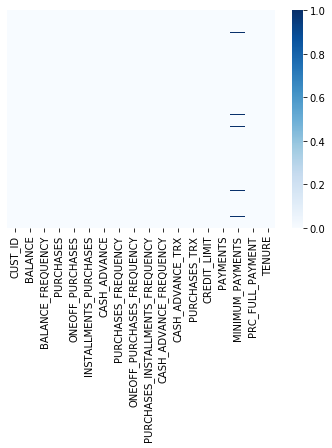

In [5]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False,cmap='Blues')

In [6]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].mean(),inplace=True)
creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean(),inplace=True)

In [8]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
creditcard_df=creditcard_df.drop('CUST_ID',axis=1)

In [10]:
plt.subplot?

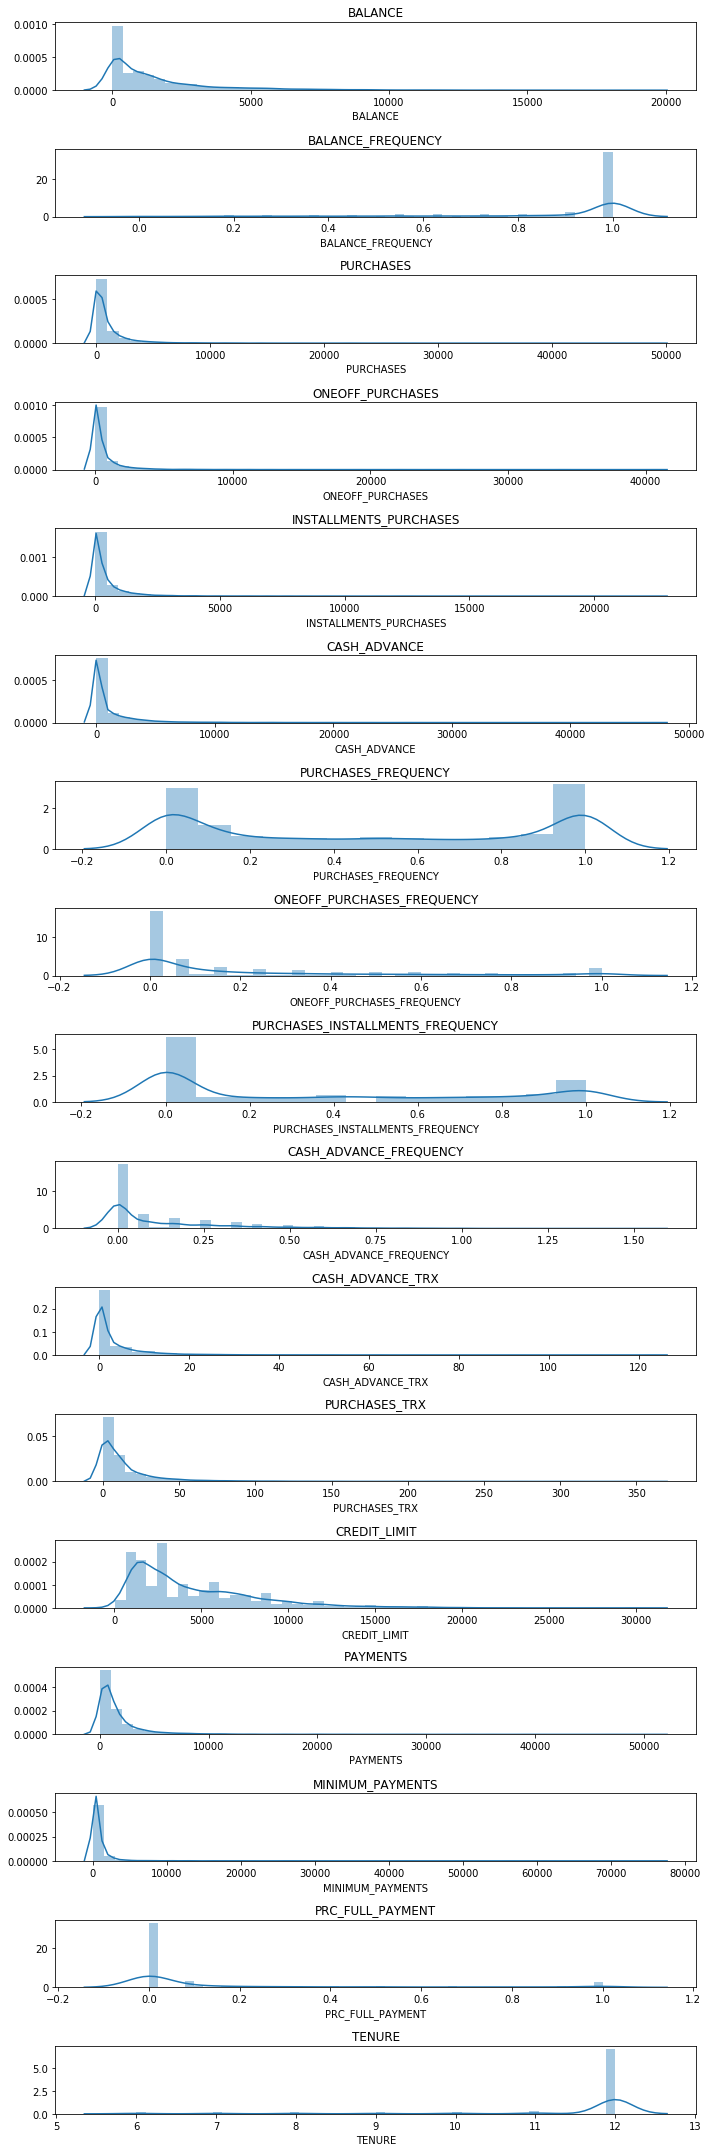

In [11]:
plt.figure(figsize=(10,30))
for i in range(len(creditcard_df.columns)):
    plt.subplot(len(creditcard_df.columns),1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]],)
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

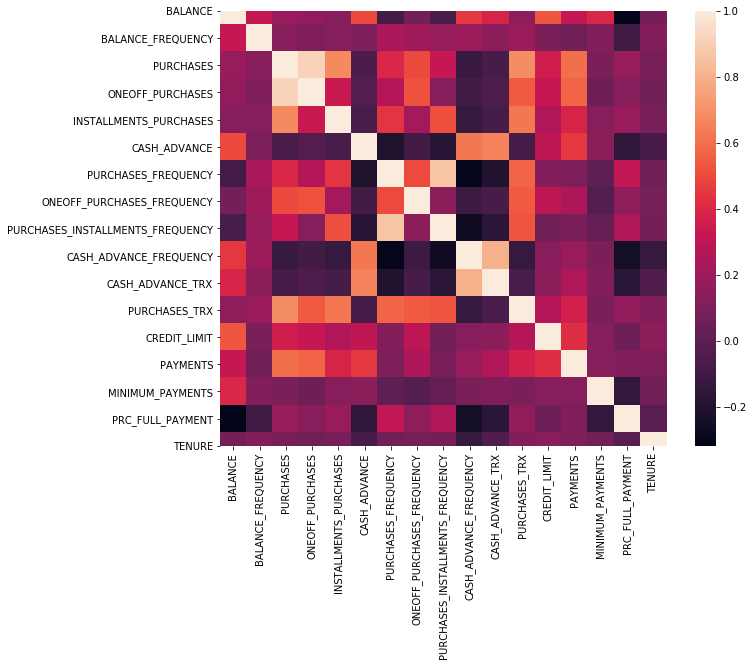

In [13]:
corrmatrix=creditcard_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix)

In [42]:
len(creditcard_df)

8950

In [55]:
scaler=StandardScaler()
scaleddf=scaler.fit_transform(creditcard_df)

TypeError: 'numpy.ndarray' object is not callable

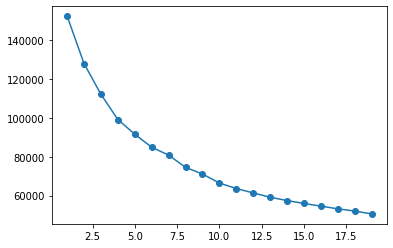

In [69]:
n=np.arange(1,20)
scores=[]
for i in n:
    km=KMeans(n_clusters=i)
    km.fit(scaleddf)
    scores.append(km.inertia_)
plt.plot(n,scores,'o-')
plt.xticks()

In [58]:
np.shape(scaleddf[:,:7])

(8950, 7)

In [61]:
scaleddf1=scaleddf[:,:7]
np.shape(scaleddf1)

(8950, 7)

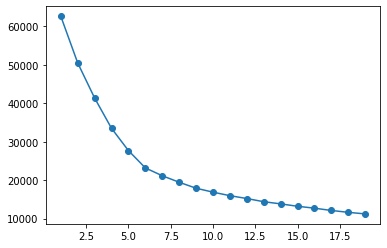

In [64]:
n=np.arange(1,20)
scores=[]
for i in n:
    km=KMeans(n_clusters=i)
    km.fit(scaleddf1)
    scores.append(km.inertia_)
plt.plot(n,scores,'o-')

In [65]:
plt.xticks?

In [70]:
kmeans=KMeans(7)
kmeans.fit(scaleddf)
labels=kmeans.labels_

In [71]:
kmeans.cluster_centers_.shape

(7, 17)

In [73]:
clustercenters=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])
clustercenters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.698378,-2.118594,-0.313274,-0.233863,-0.310991,-0.310300,-0.542818,-0.432845,-0.441636,-0.488741,-0.362626,-0.424945,-0.220108,-0.221642,-0.256668,0.268957,-0.173225
1,0.457458,0.446404,1.665826,1.445791,1.282553,-0.245133,1.145009,1.810047,0.921634,-0.347430,-0.263143,1.959695,1.057479,0.889684,0.074110,0.474304,0.296149
2,1.230545,0.471093,0.011928,-0.278245,0.538559,-0.023176,0.010175,-0.551169,0.257462,-0.209465,-0.048424,0.186557,-0.041945,-0.113561,10.017775,-0.525551,0.299680
3,-0.372558,0.337512,-0.004138,-0.120198,0.210980,-0.369650,0.967659,0.116901,0.896437,-0.461209,-0.358893,0.177667,-0.206636,-0.214692,-0.138404,0.349825,0.027479
4,-0.006613,0.371548,-0.346959,-0.224486,-0.407852,-0.079339,-0.843956,-0.357895,-0.776213,0.135835,-0.026125,-0.477089,-0.331306,-0.260847,-0.065192,-0.453455,-0.009301
5,1.568917,0.375253,-0.217107,-0.149714,-0.238366,1.946050,-0.452387,-0.173399,-0.418228,1.908781,1.849292,-0.262368,0.961684,0.754440,0.352887,-0.390940,-0.084088
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [74]:
clusters=scaler.inverse_transform(clustercenters)

In [77]:
pd.DataFrame(data=clusters,columns=creditcard_df.columns)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,110.860345,0.375395,333.889887,204.271866,129.842190,328.157100,0.272492,0.073332,0.188920,0.037342,0.774169,4.147281,3693.605660,1091.512634,266.051919,2.323799e-01,11.285498
1,2516.634981,0.983020,4562.267484,2992.153567,1570.864856,464.814878,0.949898,0.742430,0.730718,0.065620,1.453066,63.420526,8341.989987,4308.691250,1036.916529,2.924406e-01,11.913642
2,4125.750583,0.988868,1028.688571,130.608367,898.080204,930.270842,0.494434,0.038033,0.466759,0.093228,2.918367,19.346939,4341.836735,1404.396440,24210.209033,8.326673e-17,11.918367
3,789.027539,0.957224,994.362904,392.933210,601.854349,203.698653,0.878719,0.237332,0.720704,0.042851,0.799644,19.125979,3742.621877,1111.631190,541.662818,2.560325e-01,11.554093
4,1550.709977,0.965287,261.921720,219.835805,42.252150,812.493357,0.151630,0.095691,0.055950,0.162326,3.070541,2.851192,3289.021386,978.018333,712.280095,2.108686e-02,11.504871
5,4830.043945,0.966165,539.352466,343.941967,195.516296,5059.828116,0.308786,0.150730,0.198223,0.517111,15.868887,8.188345,7993.449059,3917.174102,1686.594296,3.937136e-02,11.404787
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,4.784091e-01,11.933333


In [81]:
ymeans=kmeans.fit_predict(scaleddf)
ymeans

array([6, 2, 5, ..., 0, 0, 0])

In [85]:
clusterdf=pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)

In [86]:
clusterdf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,3
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,3
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,4
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


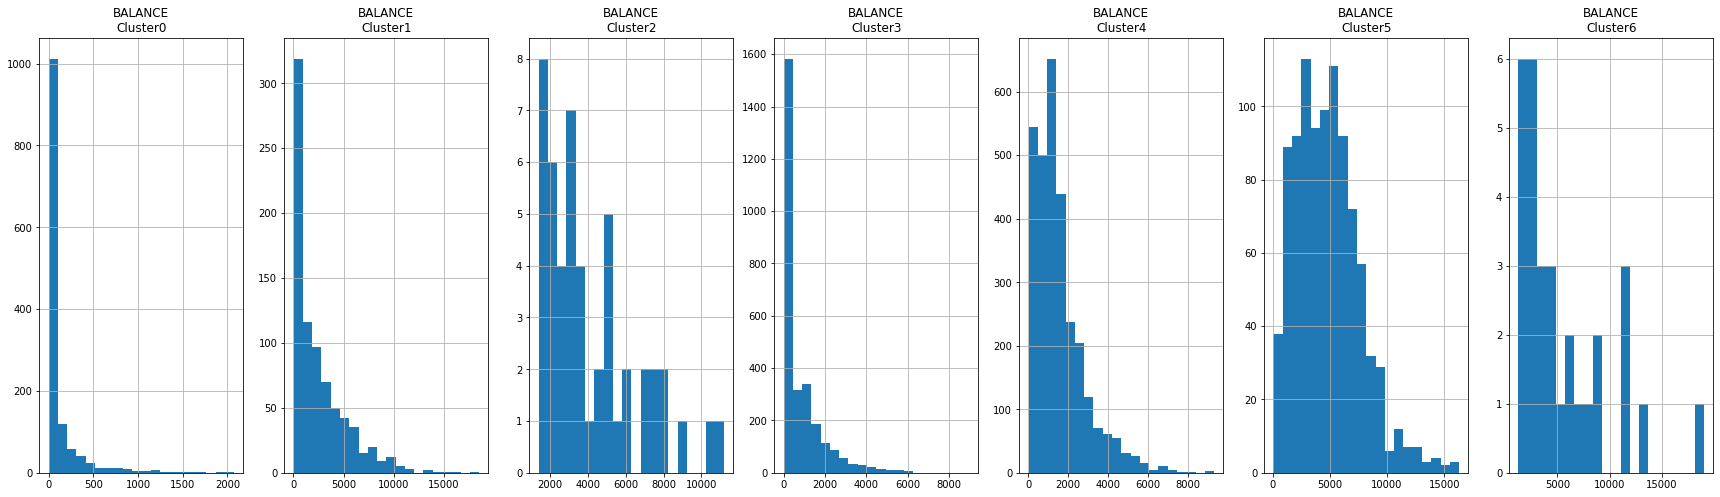

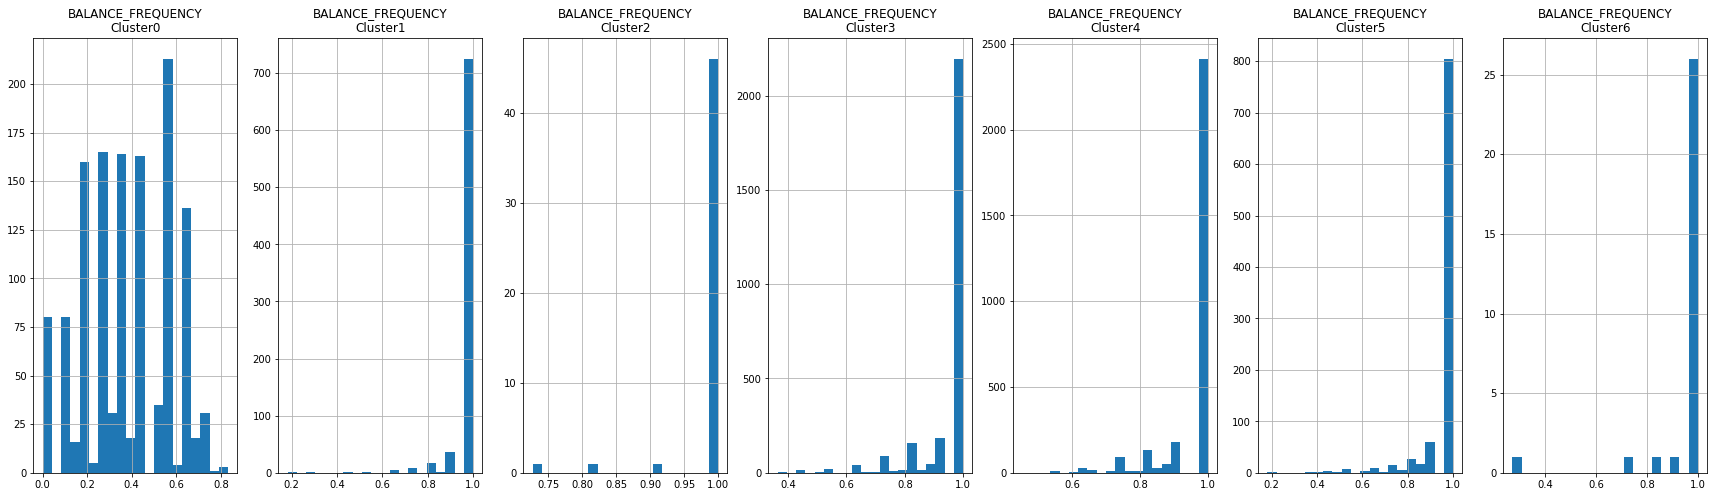

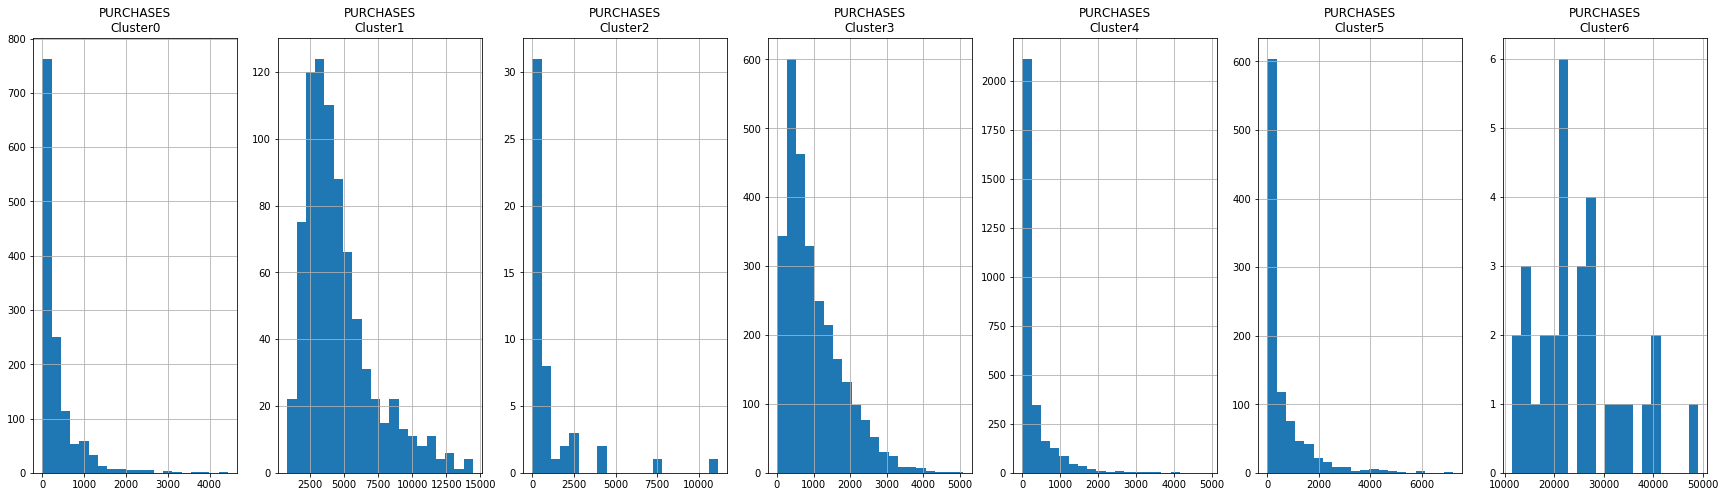

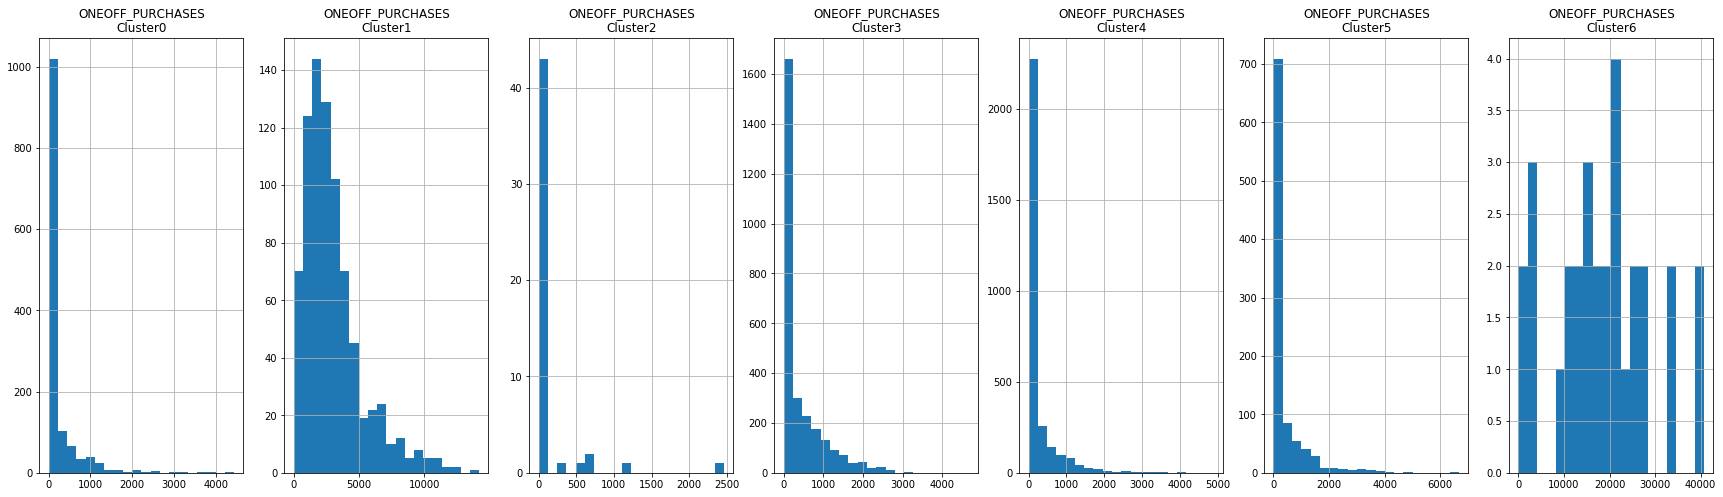

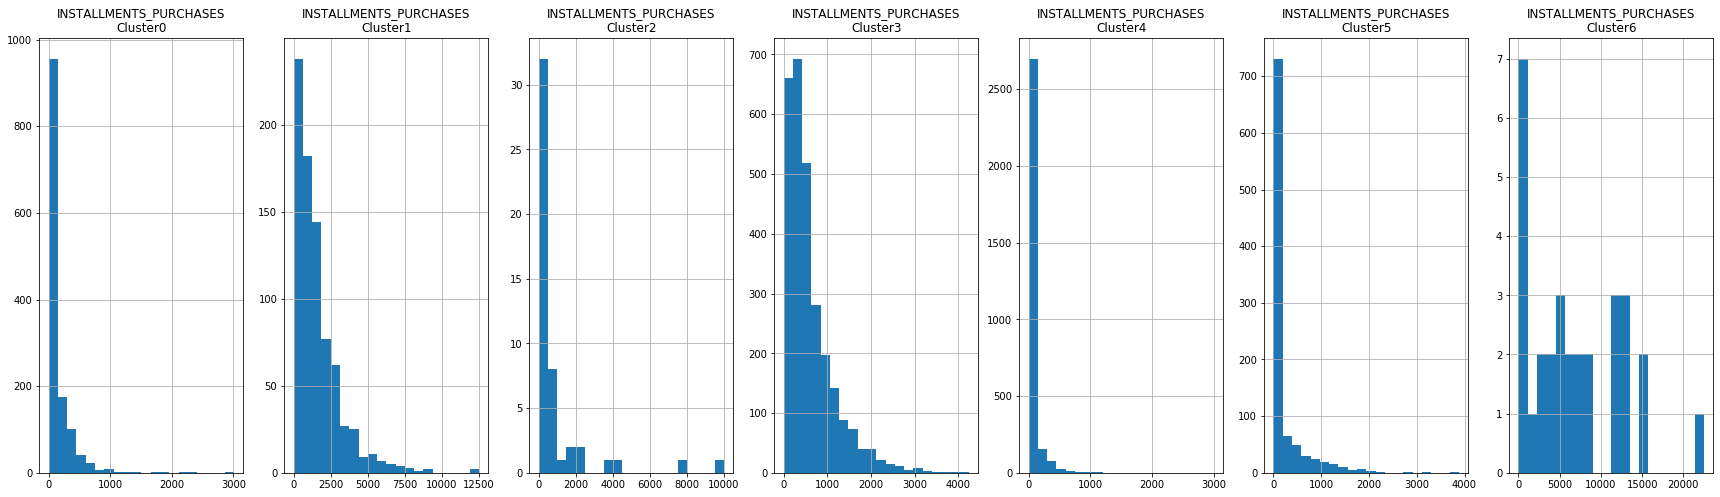

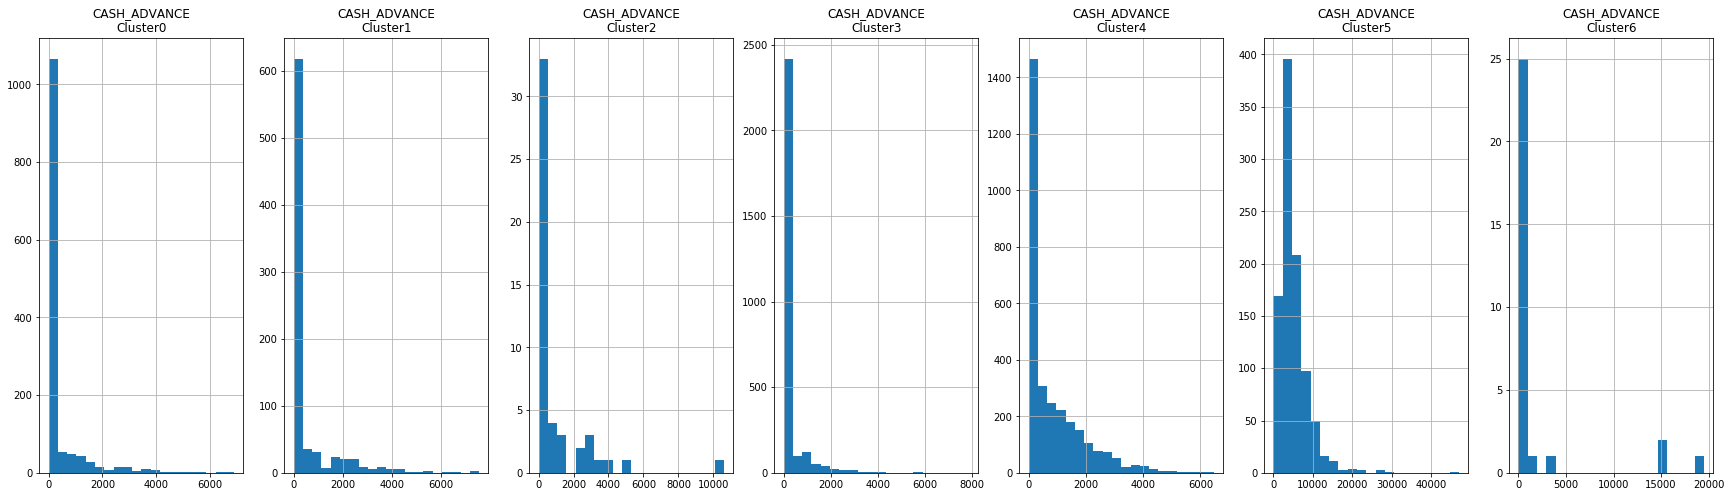

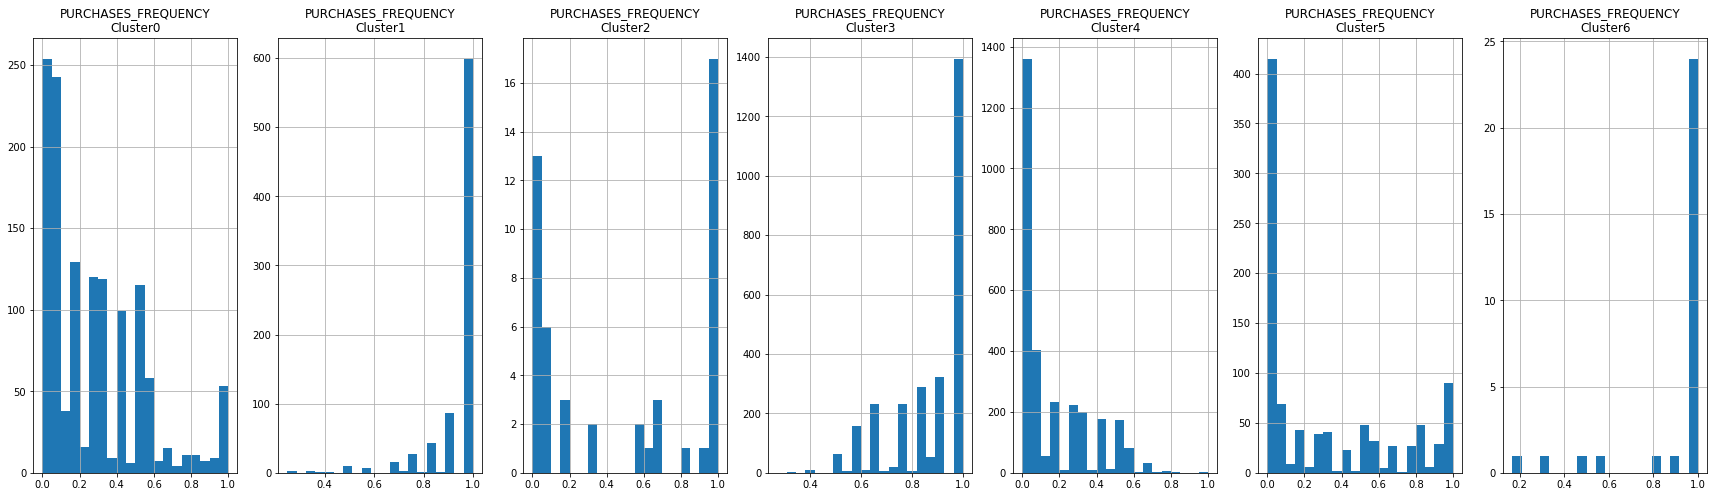

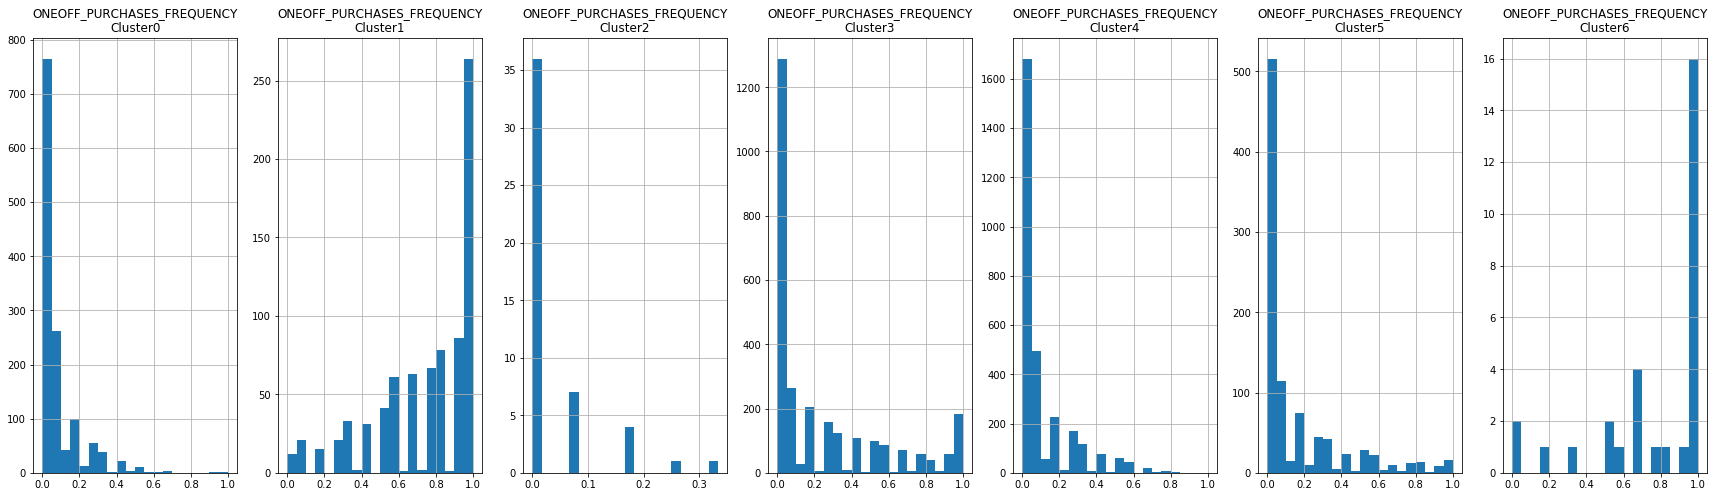

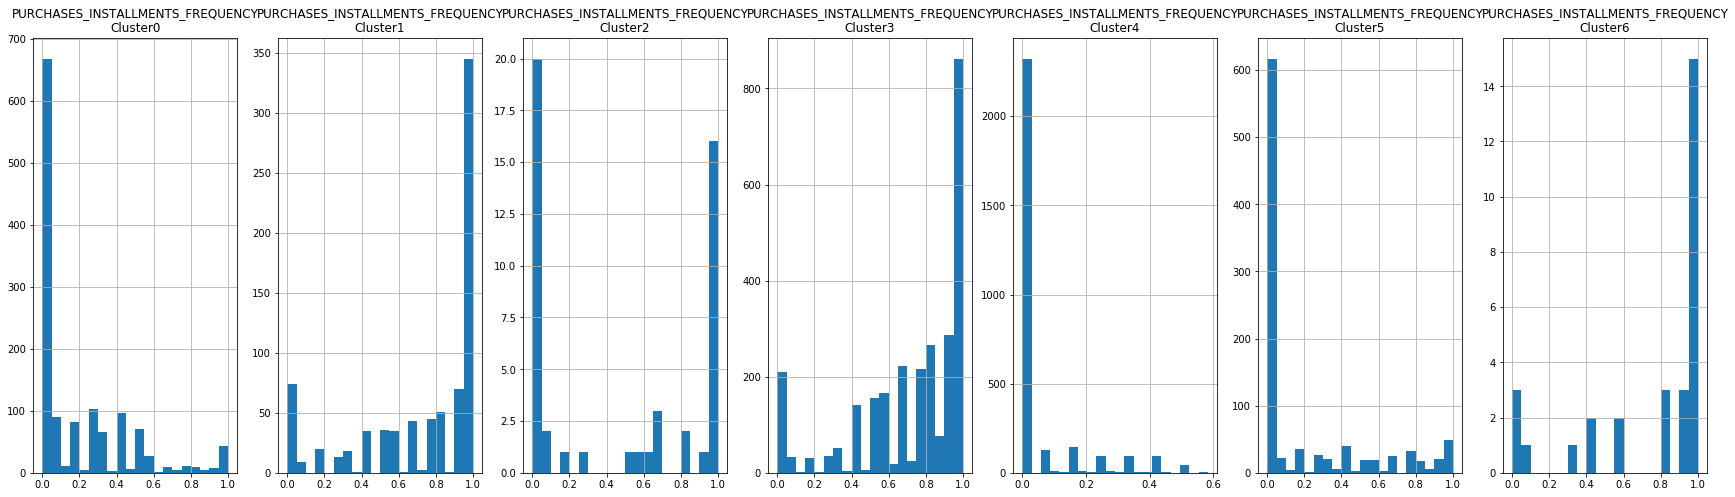

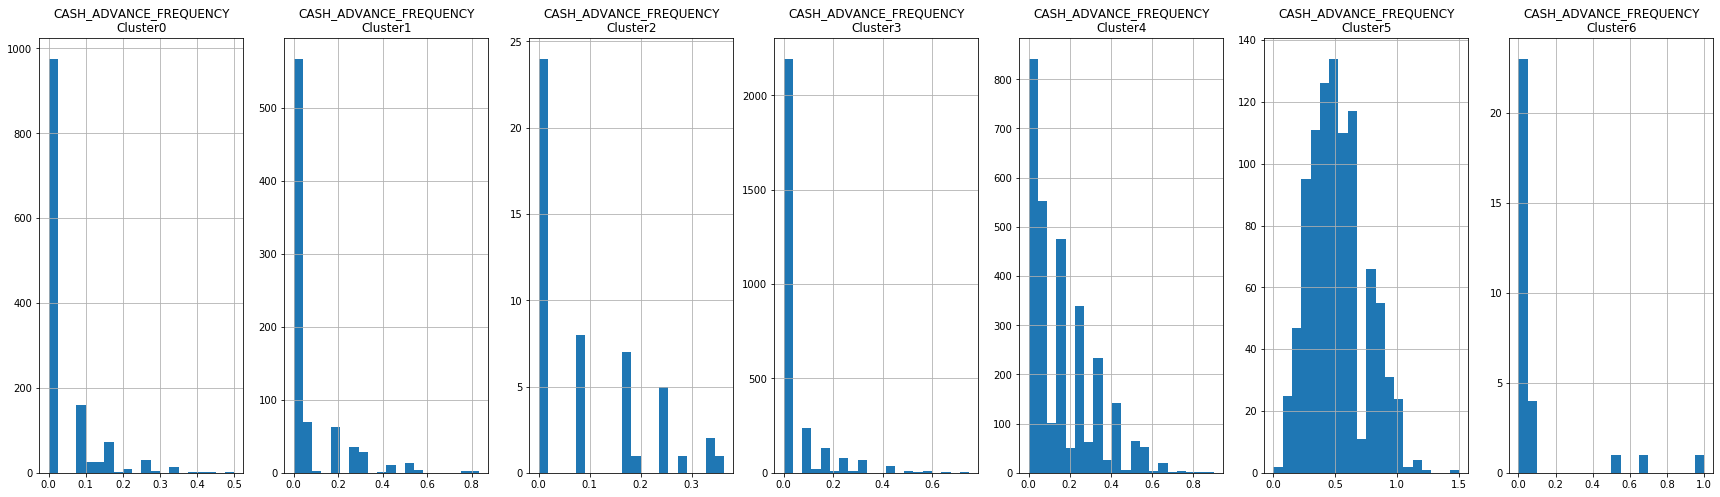

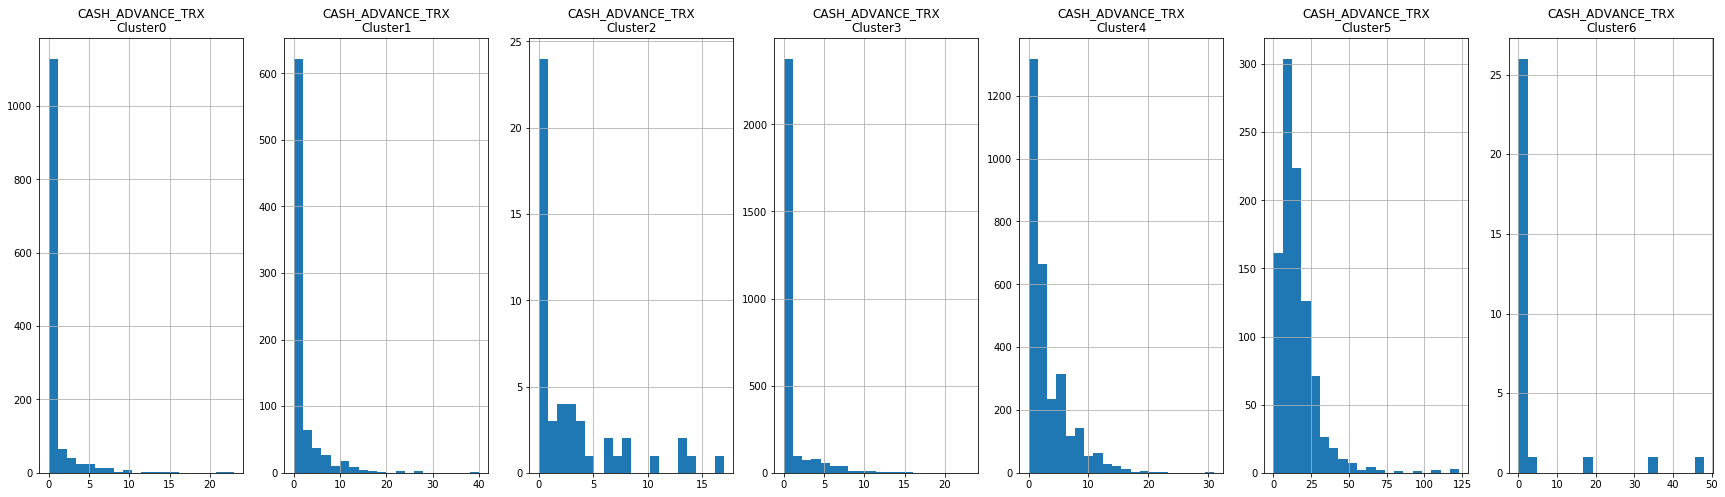

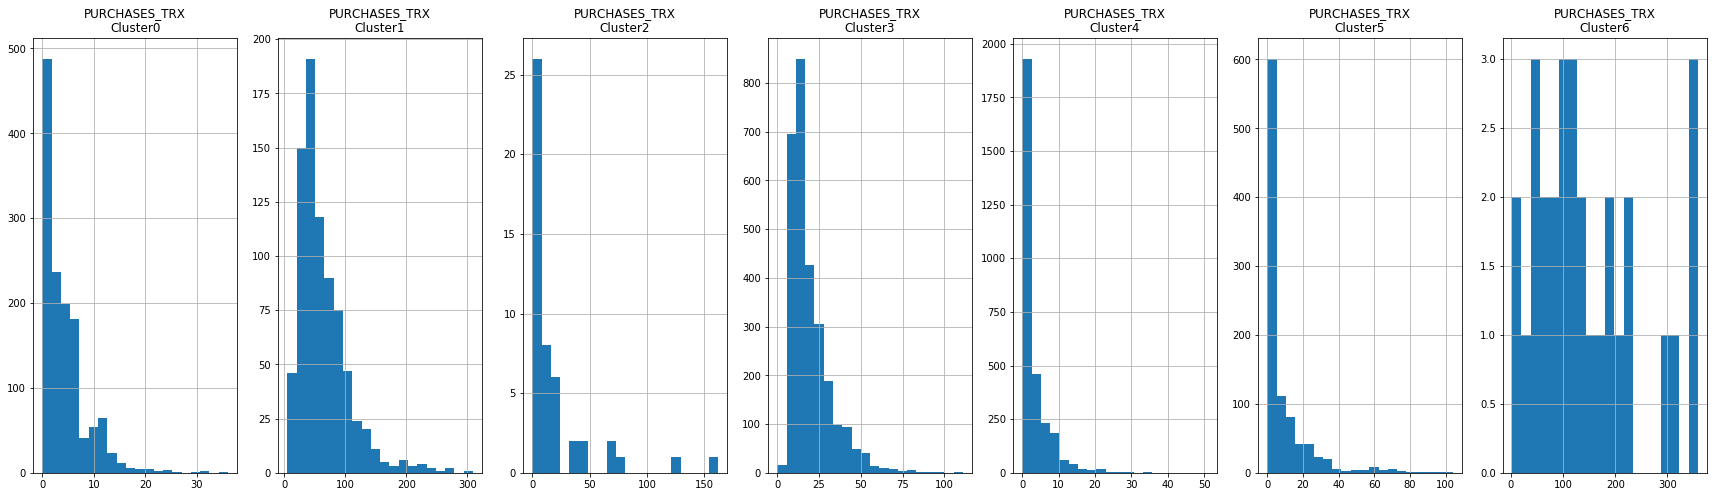

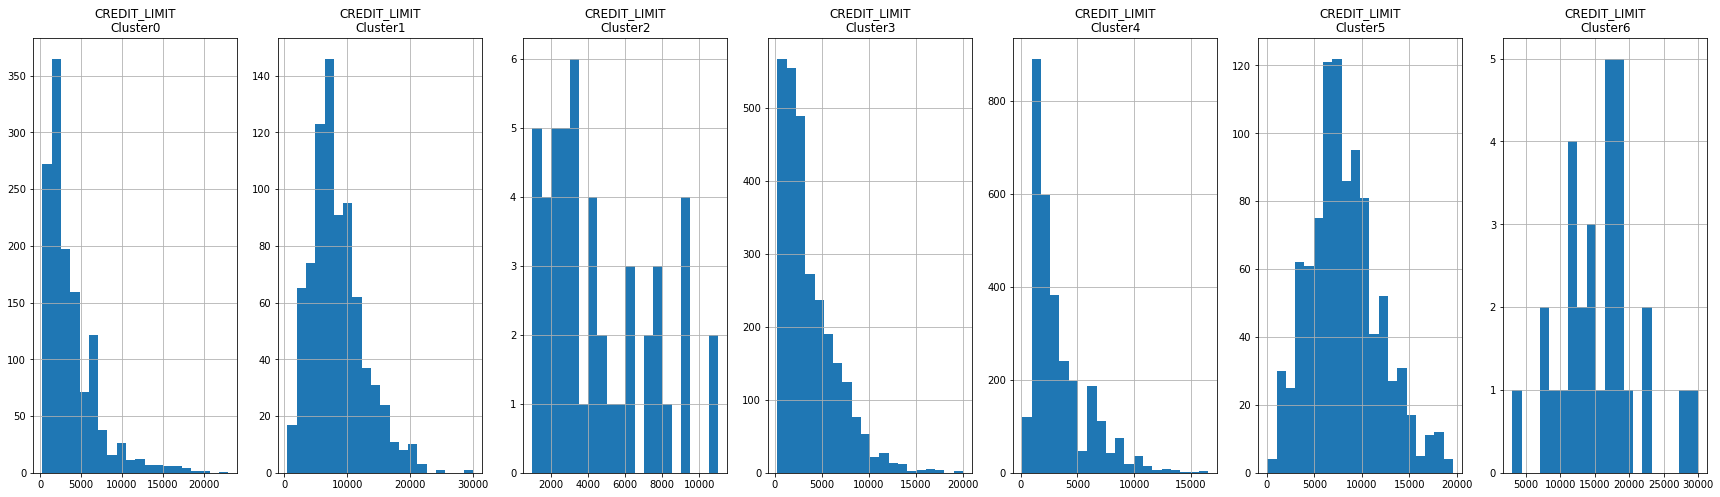

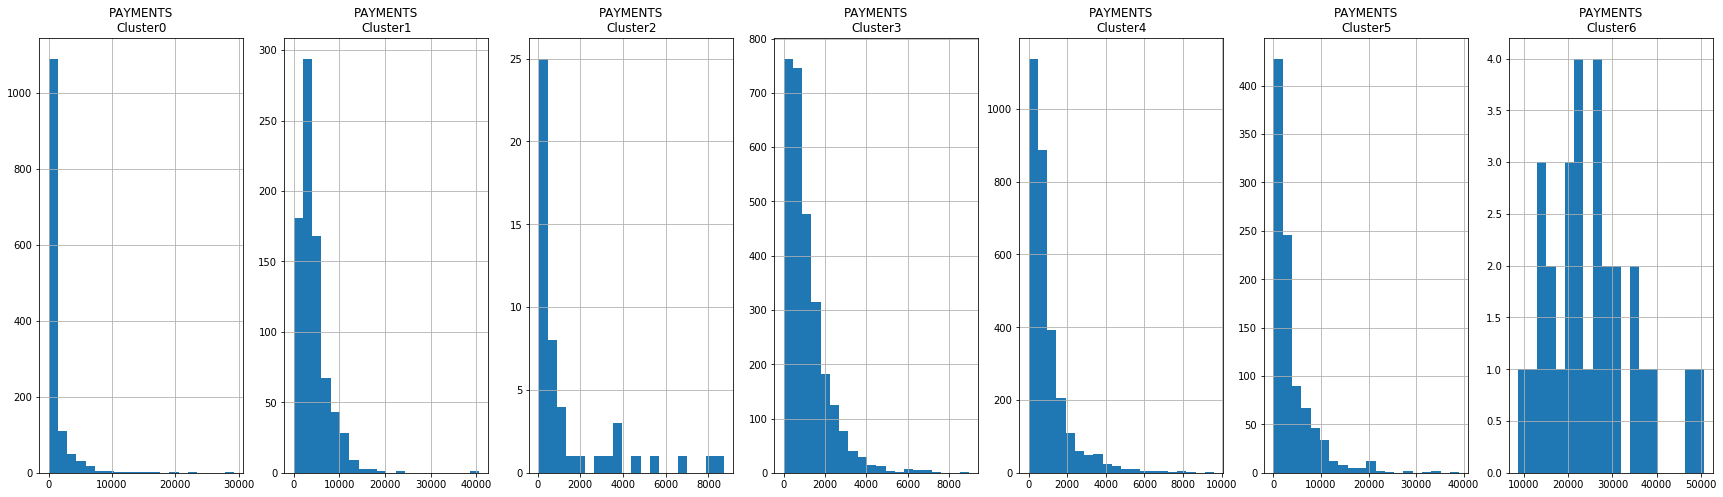

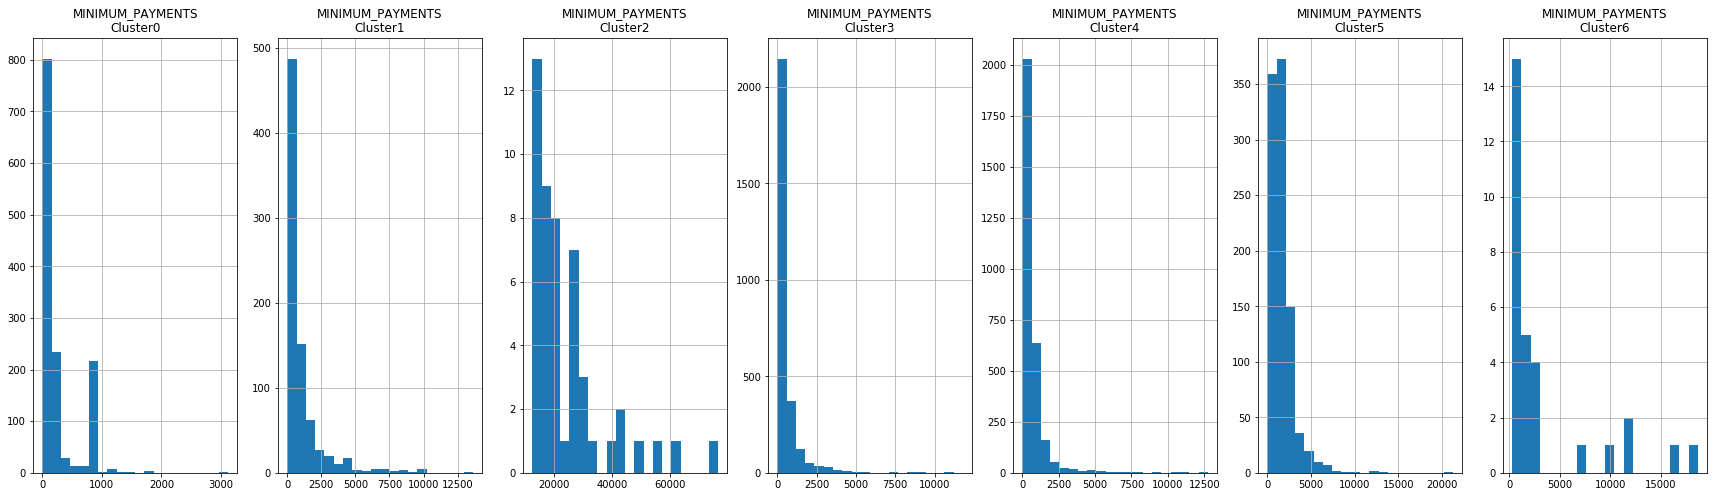

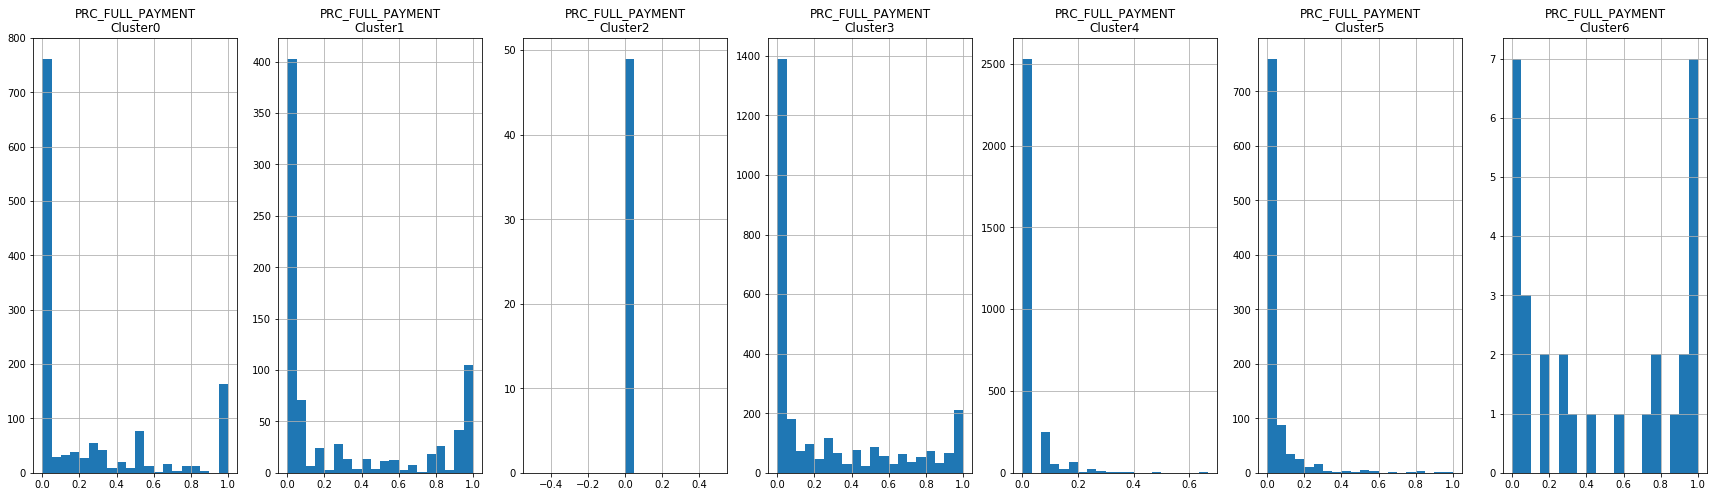

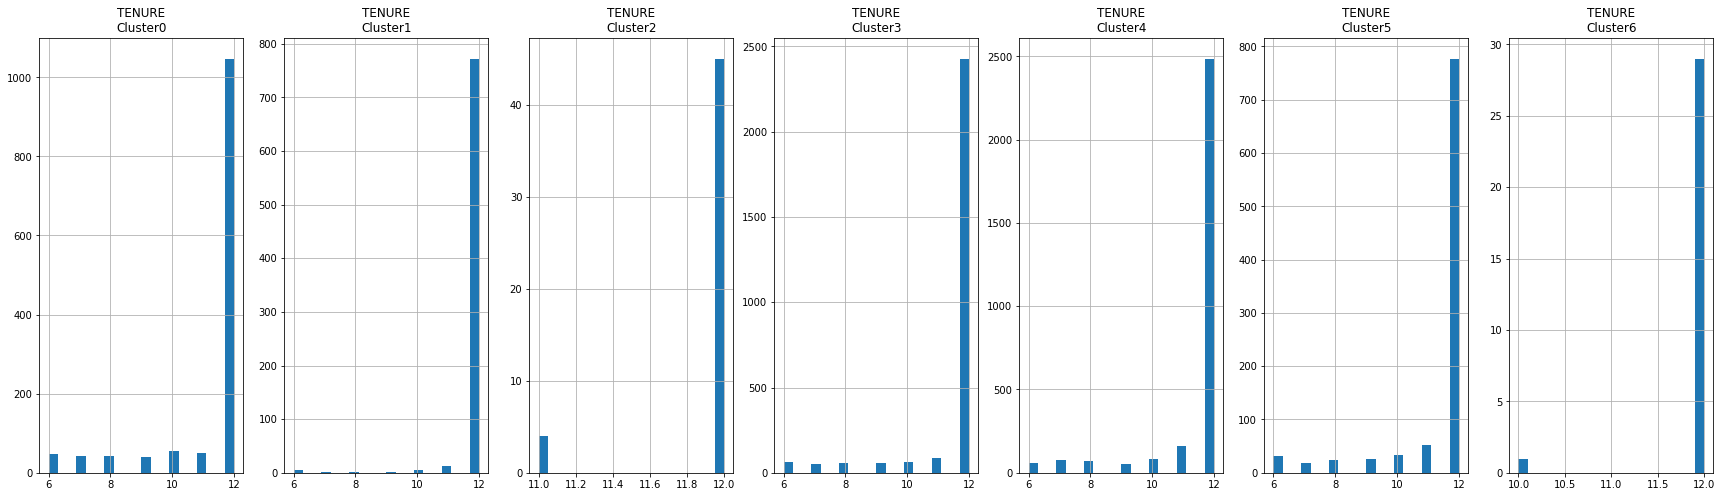

In [93]:
for i in creditcard_df.columns:
    plt.figure(figsize=(30,8))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=clusterdf[clusterdf['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}\nCluster{}'.format(i,j))

In [95]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [104]:
df_scaled=scaler.fit_transform(creditcard_df)
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [107]:
k_means=KMeans(8)
k_means.fit(df_scaled)
labels=k_means.labels_

In [108]:
labels.max()

7

In [109]:
labels.min()

0

In [110]:
cluster_centers=pd.DataFrame(data=k_means.cluster_centers_,columns=creditcard_df.columns)

In [113]:
cluster_centers=scaler.inverse_transform(cluster_centers)

In [115]:
cluster_centers=pd.DataFrame(data=cluster_centers,columns=creditcard_df.columns)

In [116]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5065.769811,0.970469,550.249883,349.868652,200.500422,5261.948007,0.306625,0.151323,0.197832,0.523371,16.661196,8.263775,8239.981882,4153.504686,2124.226928,0.039195,11.606096
1,3145.320643,0.989315,5403.203942,3455.474781,1948.824051,533.475588,0.953954,0.719355,0.792296,0.073142,1.698905,75.248175,8719.890511,5021.703229,1628.322002,0.218460,11.941606
2,1236.626849,0.971885,1087.302281,510.382669,577.287207,298.386263,0.862146,0.276966,0.695605,0.056583,1.099634,20.807587,3848.145763,1265.268291,886.576904,0.055659,11.903108
3,127.156652,0.905113,1301.741713,609.116117,692.720255,37.077642,0.851628,0.310264,0.650971,0.006402,0.119149,20.448936,5033.010155,1416.759496,182.915211,0.787845,11.771277
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,871.727207,0.795750,389.773601,252.149727,138.106190,1130.903517,0.411471,0.121920,0.271180,0.197960,3.268489,5.115756,2444.556993,597.766825,384.441450,0.143336,7.242765
6,1616.937680,0.972543,228.649880,191.135103,37.700752,817.874272,0.131553,0.082186,0.048930,0.161992,3.178880,2.447952,3426.631592,1027.411460,853.641897,0.021240,11.879369
7,108.434832,0.354438,312.361092,189.472915,123.156047,322.055321,0.256408,0.066168,0.183555,0.032950,0.734657,4.046029,3755.834336,1133.144695,274.076271,0.180700,11.780686


In [118]:
cluster_df=pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)

In [119]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,2
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,6
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,7


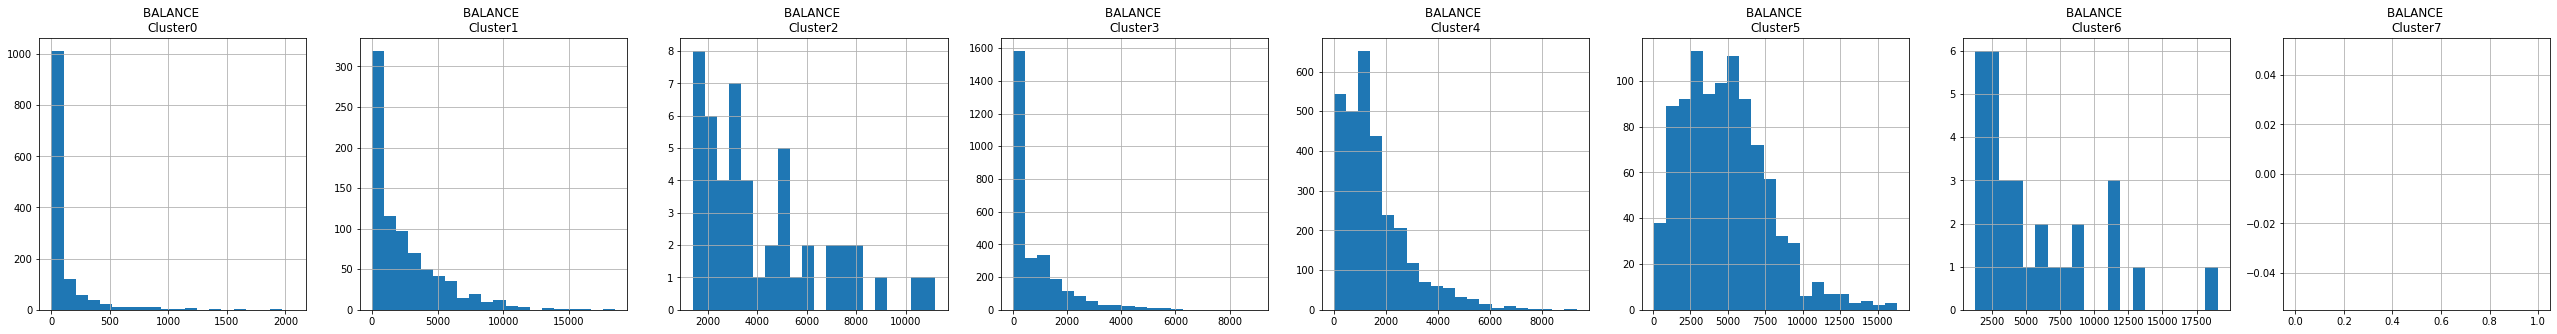

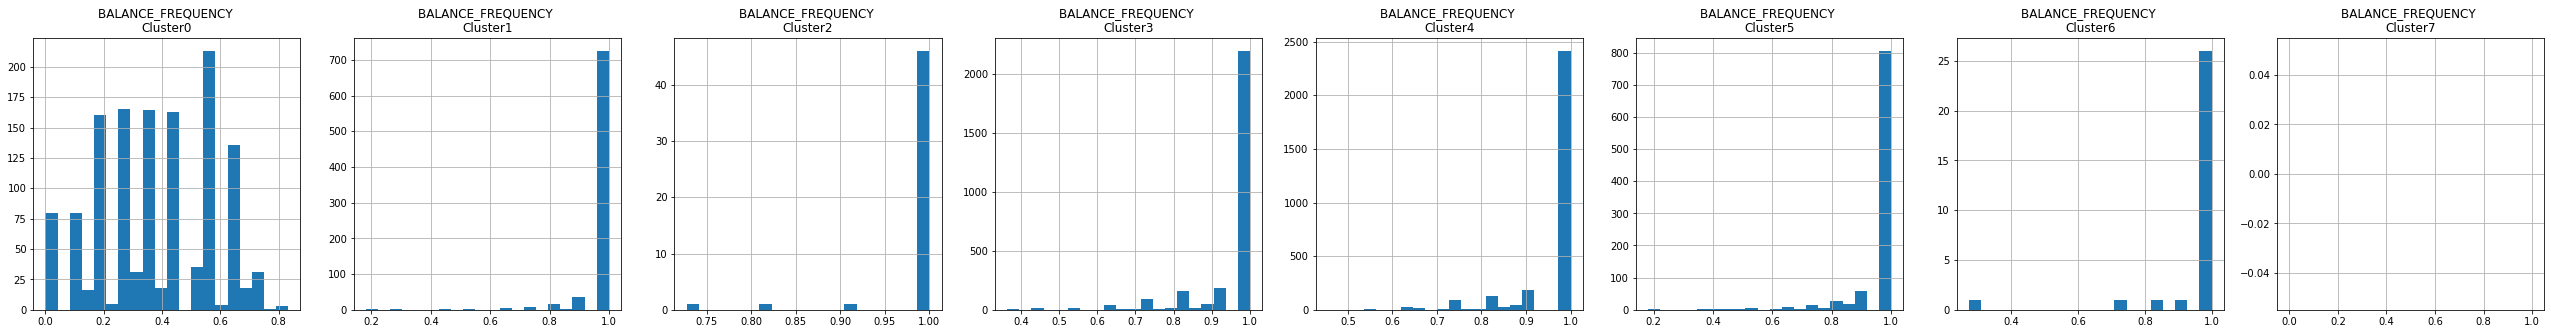

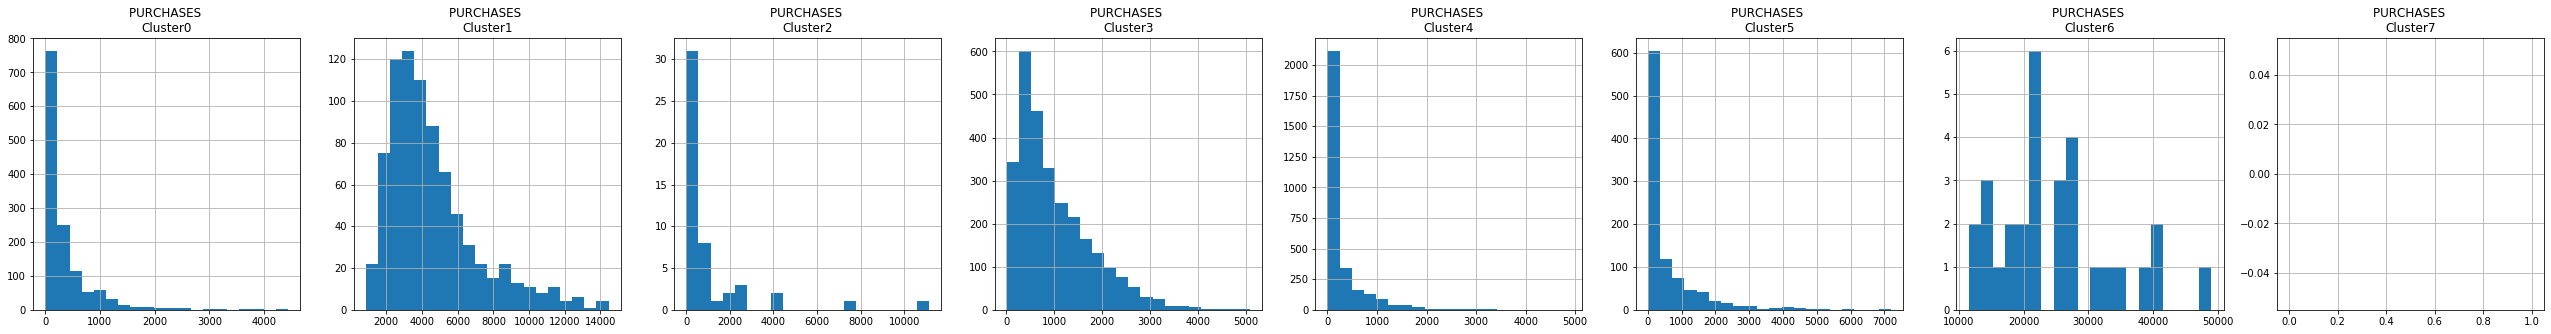

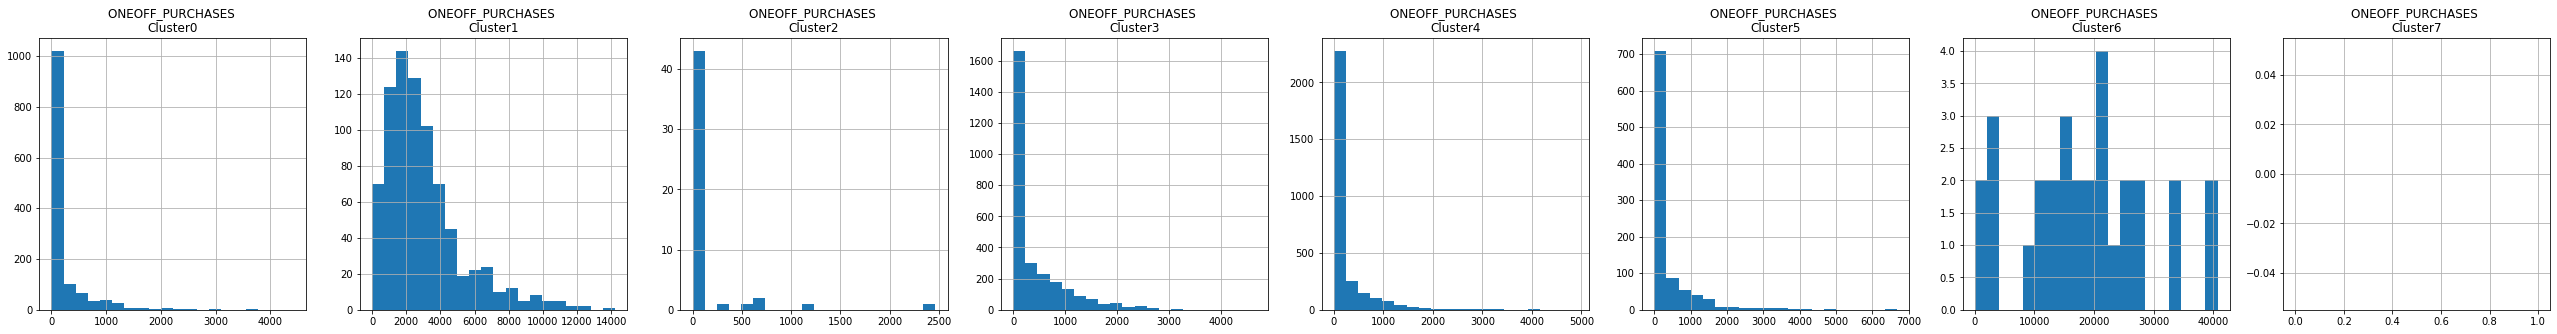

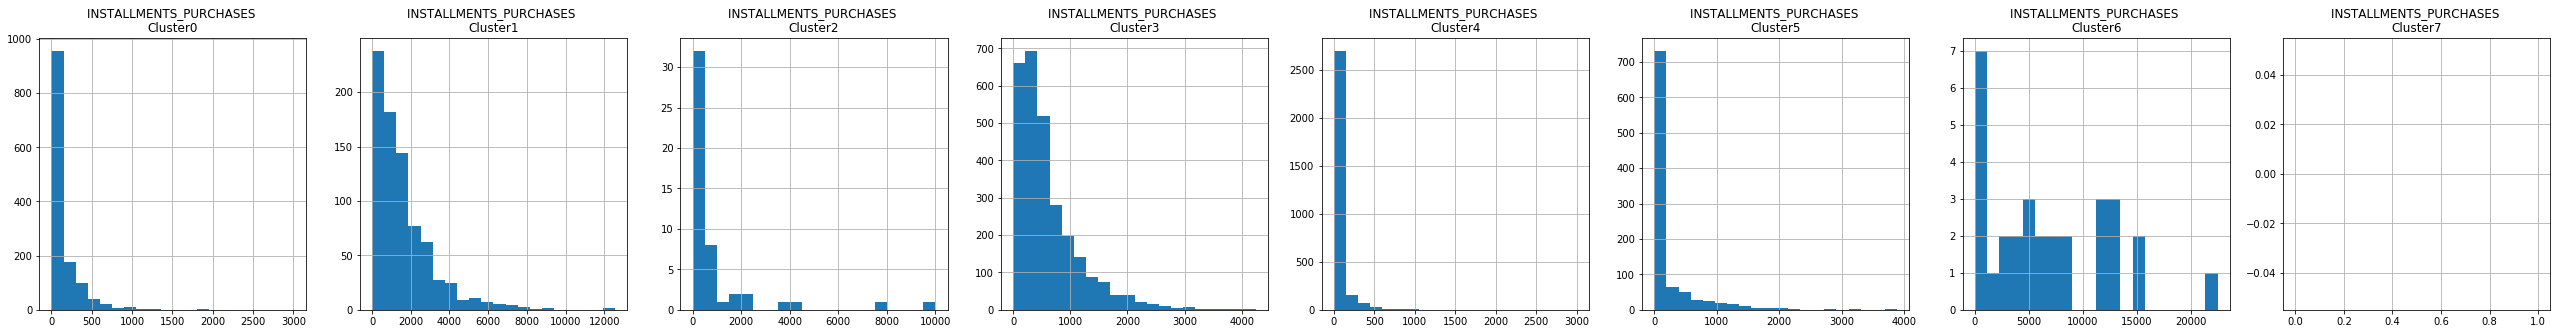

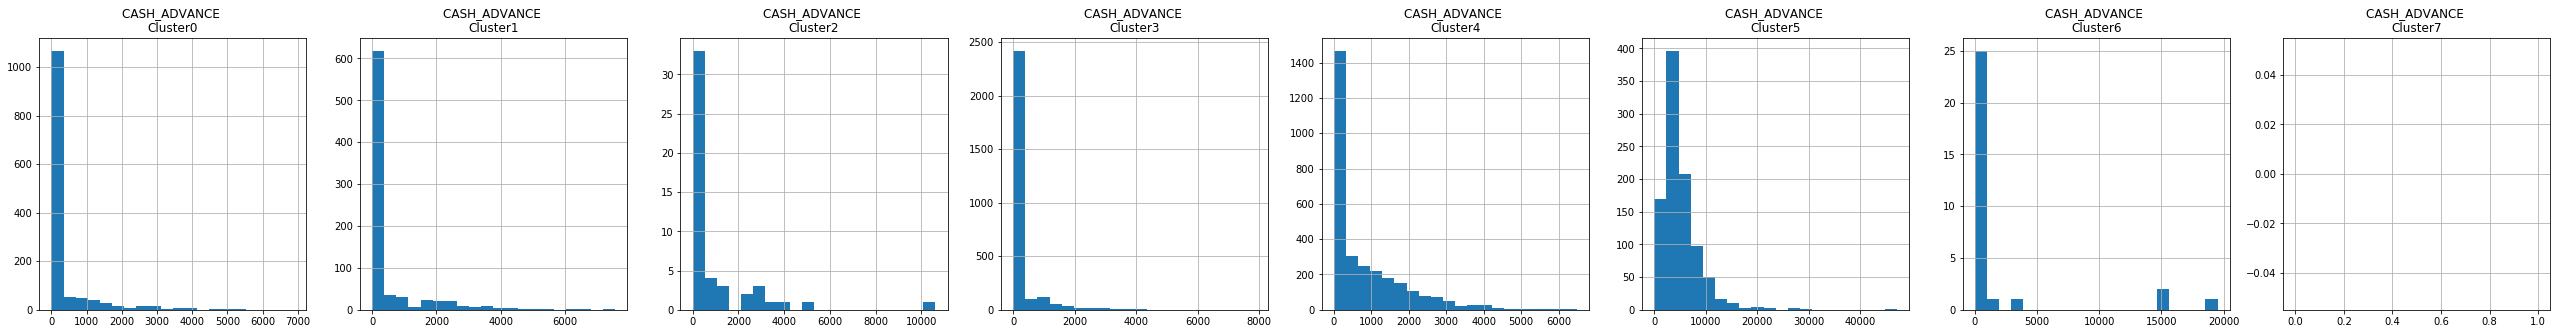

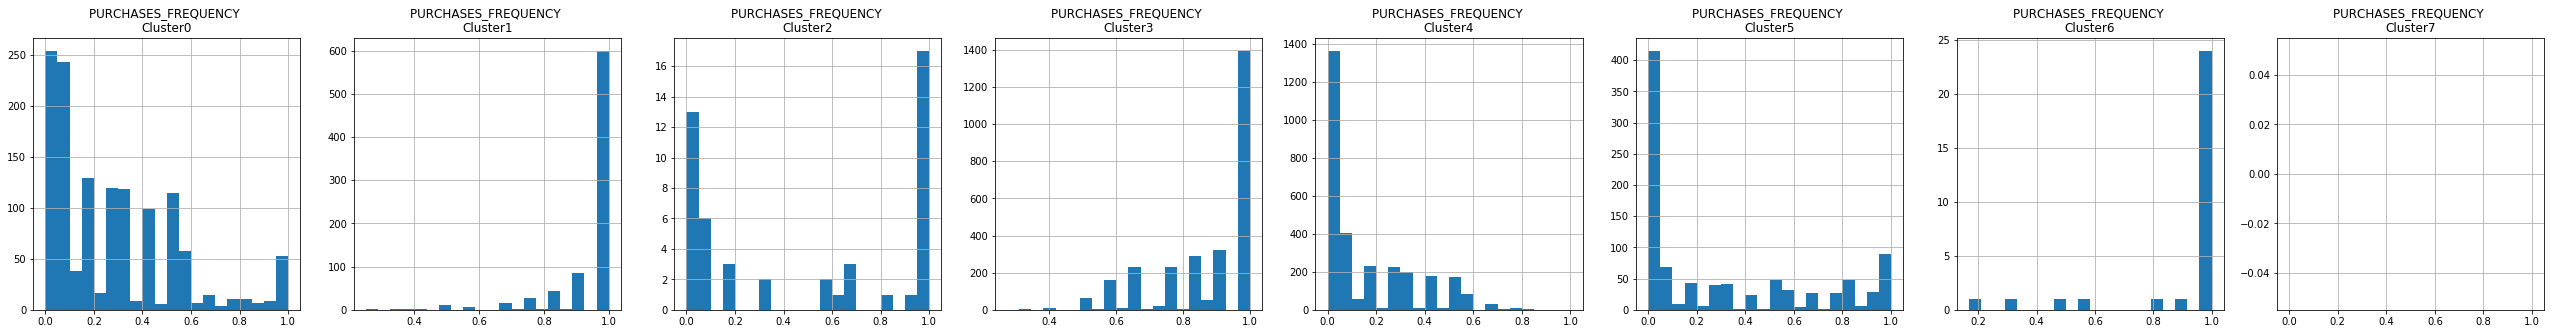

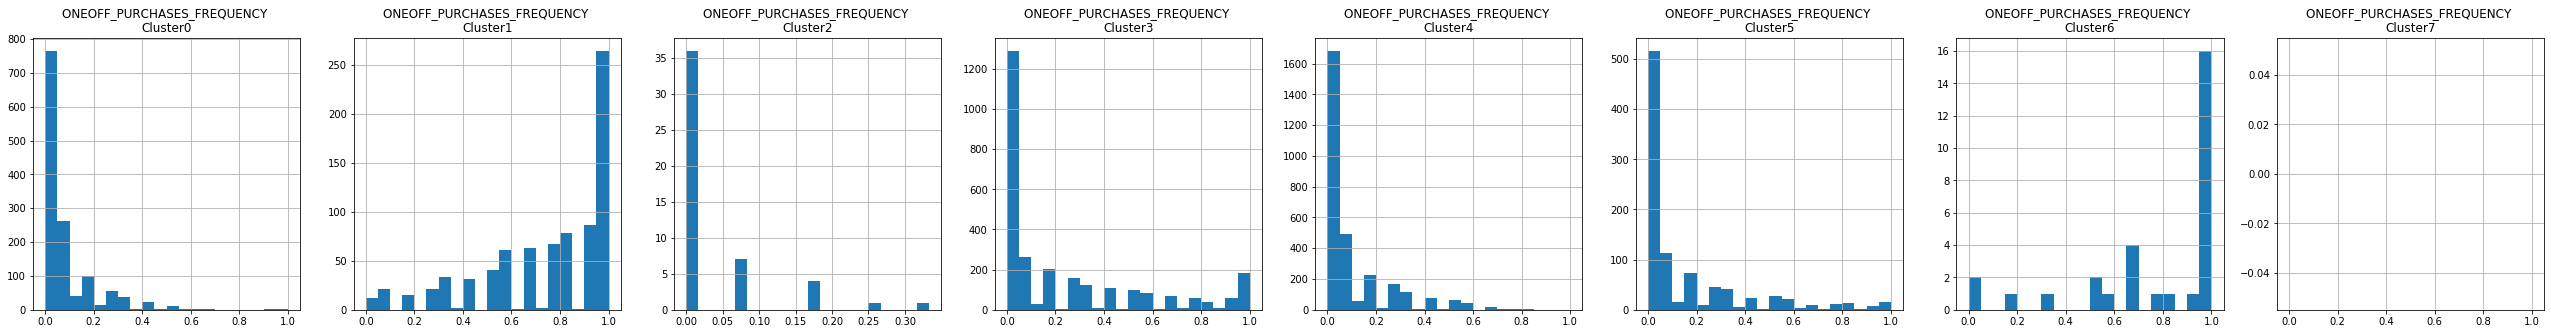

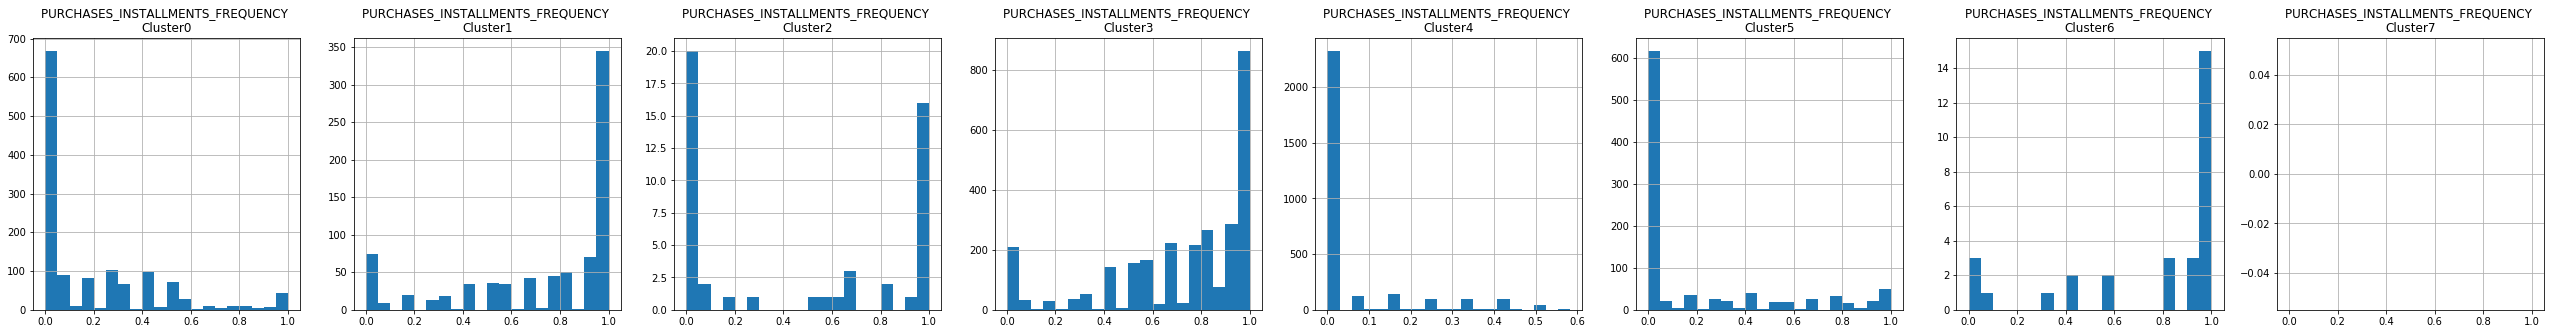

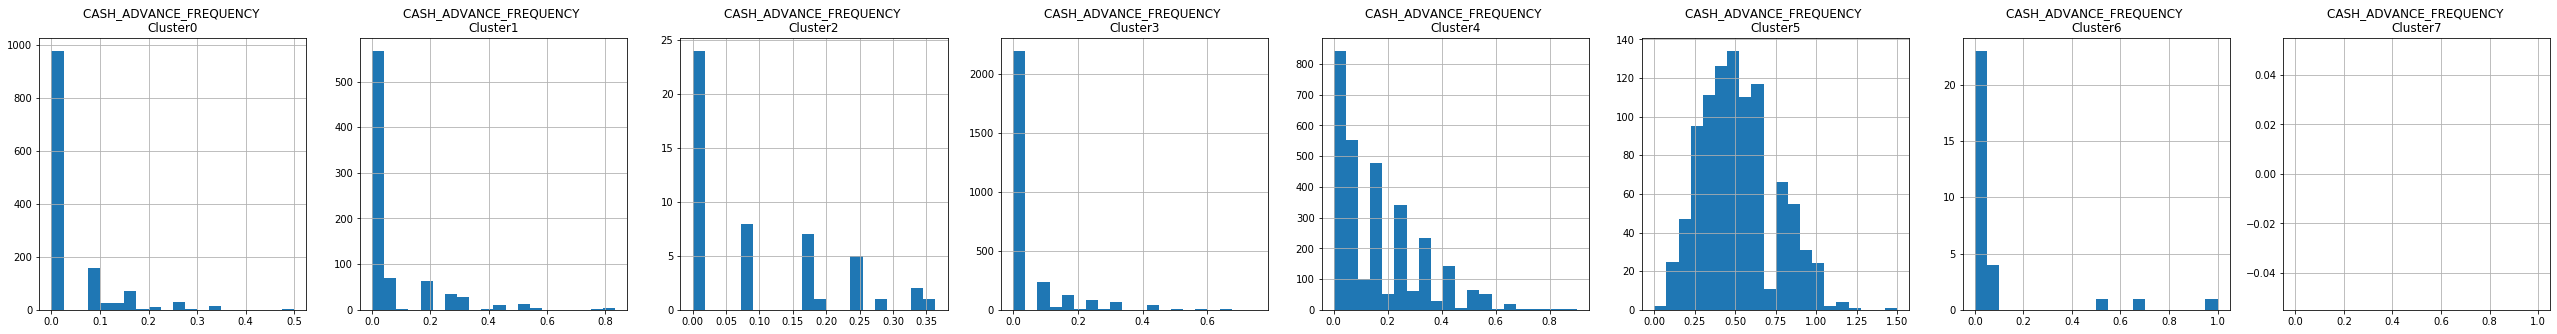

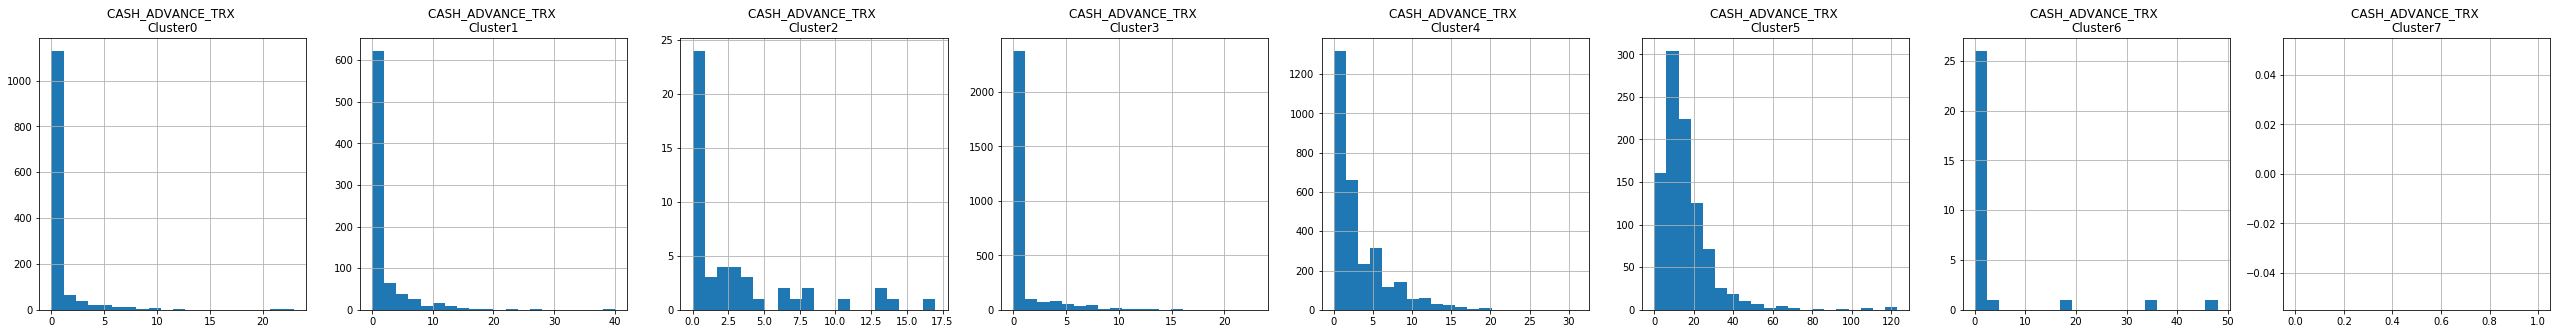

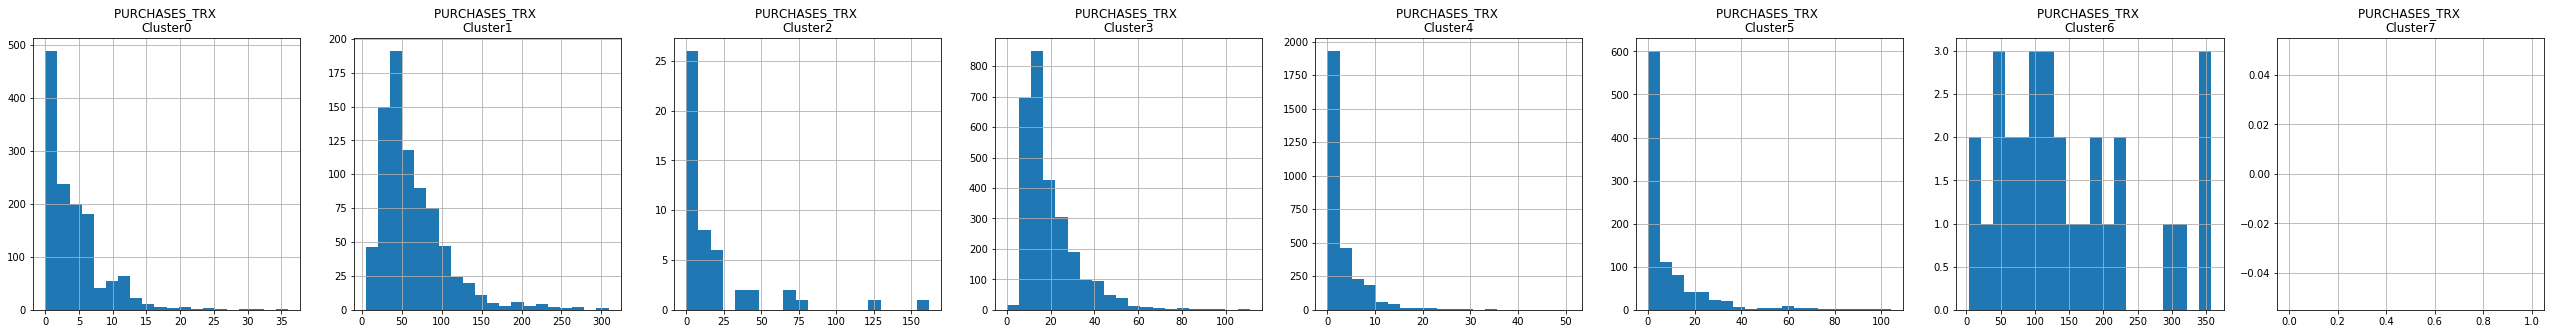

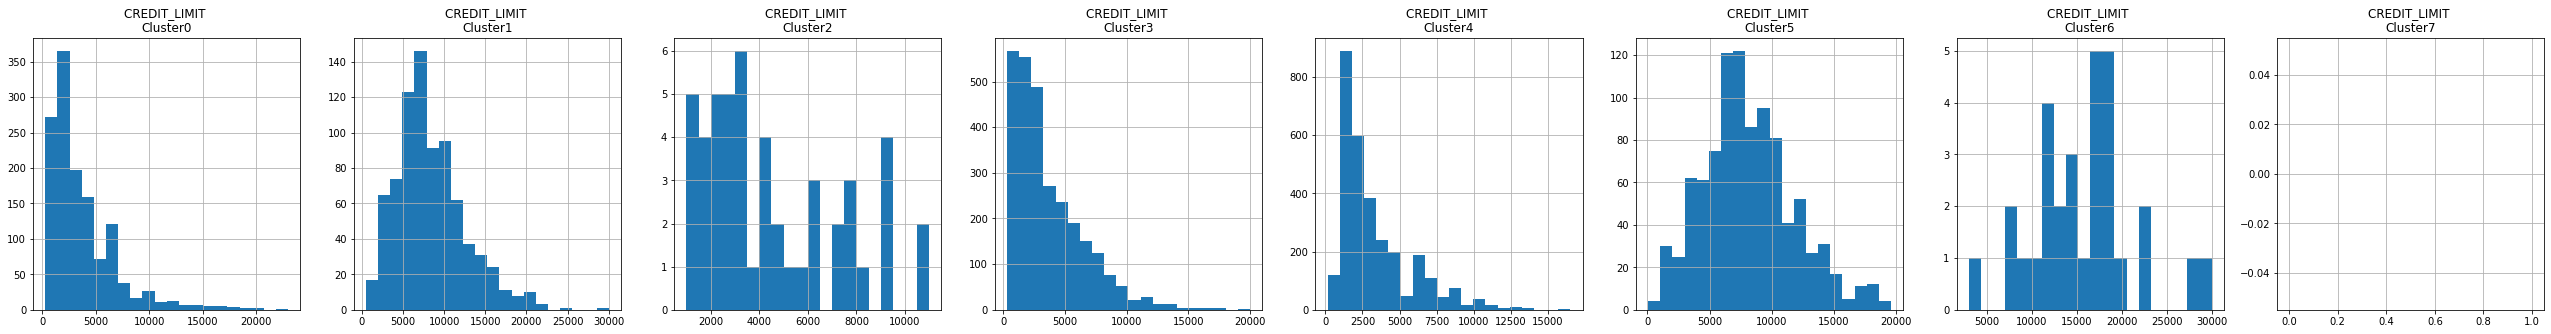

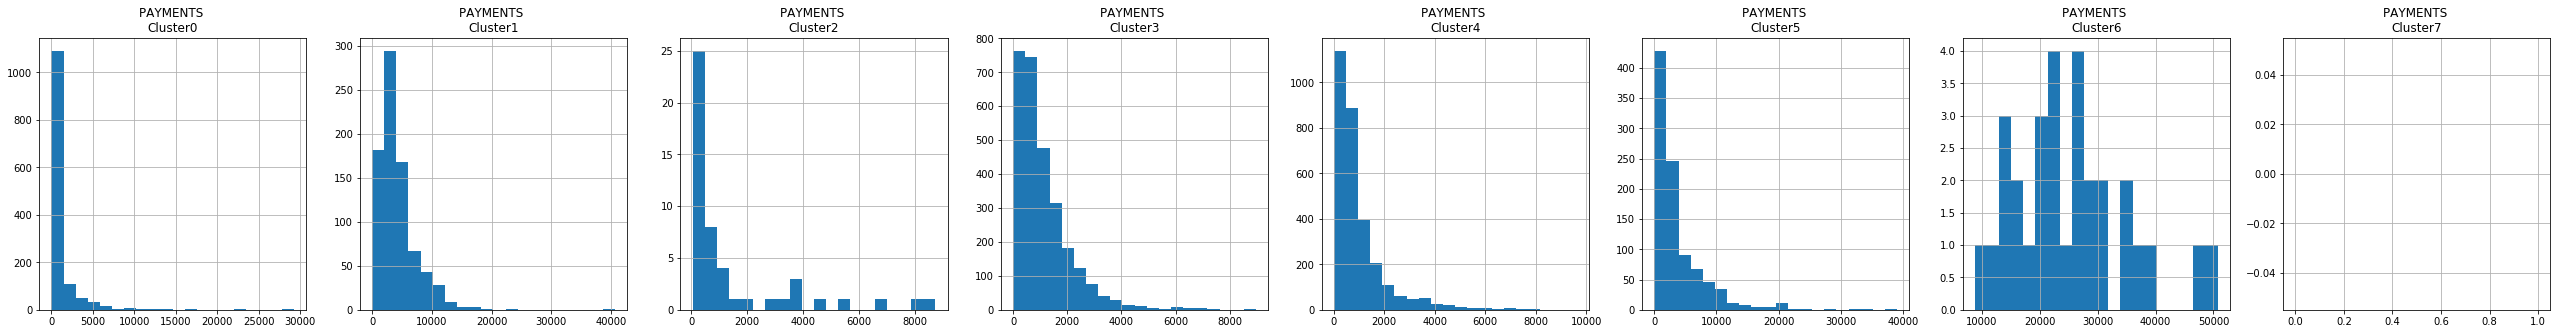

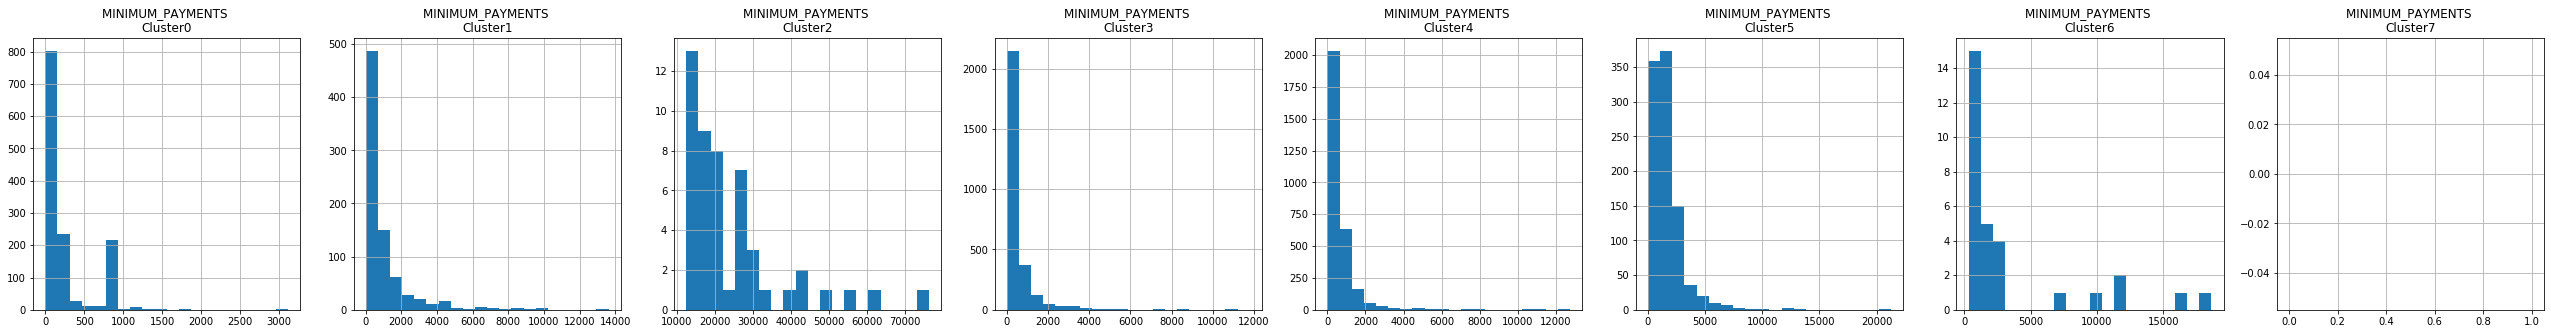

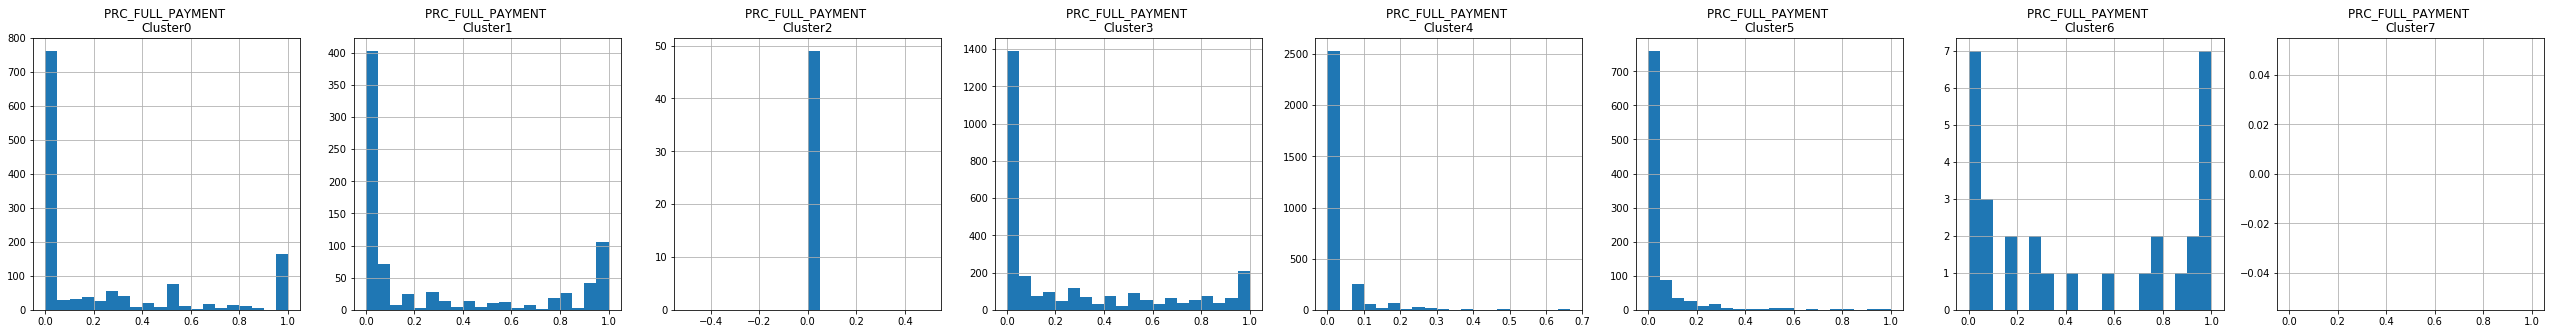

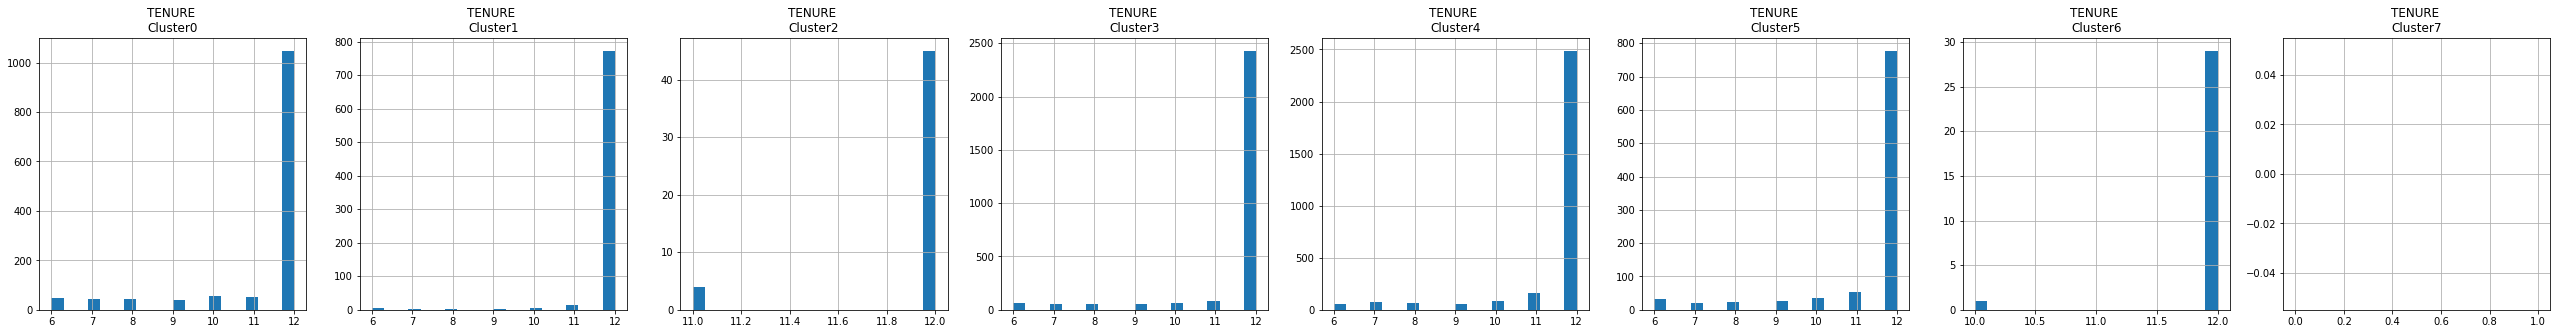

In [122]:
for i in creditcard_df.columns:
    plt.figure(figsize=(45,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=cluster_df[clusterdf['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster{}'.format(i,j))